# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [78]:
myinputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(myinputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation='tanh')(l2)
l4 = layers.Dense(64, activation="tanh")(l3)
l5 = layers.Dense(32, activation="tanh")(l4)
l6 = layers.Dense(64, activation="tanh")(l5)
l7 = layers.Dense(128, activation="tanh")(l6)
l8 = layers.Reshape([28,28])(l7)
outputs = layers.experimental.preprocessing.Rescaling(255)(l8)
mymodel = keras.Model(myinputs, outputs)
mymodel.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_16 (Rescaling)     (None, 28, 28)            0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 64)                211

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [0]:
batch_size = 64

In [81]:
#dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
history = model.fit(x_train, y_train, epochs=1, validation_data=val_dataset)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620 - val_loss: 0.0842


In [82]:
print(history.history)

{'loss': [0.06195037439465523], 'val_loss': [0.08418792486190796]}


In [83]:
print(x_train.shape)

(60000, 28, 28)


In [87]:
predictions = model.predict(x_test)
print(predictions.shape)

(10000, 10)


In [0]:
import matplotlib.pyplot as plt


In [44]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
image = x_train[5:6,:].reshape(28,28)

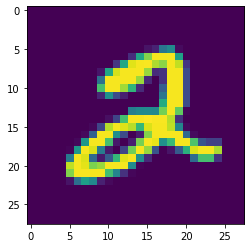

In [77]:
plt.imshow(image)

(1, 28, 28)
